In [11]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("LG_G4_C20_co_out.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []
mu_data = []
var_data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)
    if read_flag and line.startswith("mu"):
        mu_data.append(line)
    if read_flag and line.startswith("sigma"):
        var_data.append(line)

In [12]:
data

['t_n103        26.0887 (20.0198, 34.8283) (19.3953, 33.7181) 14.3228 (Jnode 202)\n',
 't_n104        20.3914 (16.5746, 25.7315) (16.2141, 25.0955)  8.8815 (Jnode 201)\n',
 't_n105        19.6350 (15.9964, 24.7356) (15.6061, 24.1097)  8.5036 (Jnode 200)\n',
 't_n106        17.6807 (14.4886, 22.2011) (14.2514, 21.7463)  7.4949 (Jnode 199)\n',
 't_n107        17.1748 (14.1066, 21.5508) (13.8314, 21.0623)  7.2309 (Jnode 198)\n',
 't_n108        16.2634 (13.3753, 20.3629) (13.1193, 19.9146)  6.7953 (Jnode 197)\n',
 't_n109         8.8413 ( 7.6168, 11.0179) ( 7.4326, 10.5885)  3.1559 (Jnode 196)\n',
 't_n110         8.7674 ( 7.5553, 10.9243) ( 7.3580, 10.4732)  3.1152 (Jnode 195)\n',
 't_n111         8.5296 ( 7.3642, 10.6232) ( 7.1634, 10.1780)  3.0146 (Jnode 194)\n',
 't_n112         8.2096 ( 7.0879, 10.2212) ( 6.9198,  9.8168)  2.8970 (Jnode 193)\n',
 't_n113         7.8311 ( 6.7695,  9.7480) ( 6.6104,  9.3550)  2.7446 (Jnode 192)\n',
 't_n114         5.3410 ( 4.5764,  6.4681) ( 4.5101,  

In [13]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

posterior_mean_mu_iqtree = []
posterior_mean_mu_baseml = []

posterior_mean_var_iqtree = []
posterior_mean_var_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

lower_ci_mu_iqtree = []
upper_ci_mu_iqtree = []

lower_ci_var_iqtree = []
upper_ci_var_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []

lower_ci_mu_baseml = []
upper_ci_mu_baseml = []

lower_ci_var_baseml = []
upper_ci_var_baseml = []

In [14]:
for line in data:
    line = line.strip().split()
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     else:
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     if line[4].startswith('('):
#         upper_ci_iqtree.append(float(line[4][1:-1]))
#     else:
#         upper_ci_iqtree.append(float(line[4][:-1]))
#     # posterior_mean_baseml.append(float(line[4]))
#     # lower_ci_baseml.append(float(line[5]))
#     # upper_ci_baseml.append(float(line[6]))
# 
# for line in mu_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_iqtree.append(float(line[1]))
#     lower_ci_mu_iqtree.append(float(line[3][:-1]))
#     upper_ci_mu_iqtree.append(float(line[4][:-1]))
# #
# # for line in var_data:
# #     line = line.strip().split()
# #     # node_name.append(line[0])
# #     posterior_mean_var_iqtree.append(float(line[1]))
# #     lower_ci_var_iqtree.append(float(line[3][:-1]))
# #     upper_ci_var_iqtree.append(float(line[4][:-1]))

In [15]:
node_name

['t_n103',
 't_n104',
 't_n105',
 't_n106',
 't_n107',
 't_n108',
 't_n109',
 't_n110',
 't_n111',
 't_n112',
 't_n113',
 't_n114',
 't_n115',
 't_n116',
 't_n117',
 't_n118',
 't_n119',
 't_n120',
 't_n121',
 't_n122',
 't_n123',
 't_n124',
 't_n125',
 't_n126',
 't_n127',
 't_n128',
 't_n129',
 't_n130',
 't_n131',
 't_n132',
 't_n133',
 't_n134',
 't_n135',
 't_n136',
 't_n137',
 't_n138',
 't_n139',
 't_n140',
 't_n141',
 't_n142',
 't_n143',
 't_n144',
 't_n145',
 't_n146',
 't_n147',
 't_n148',
 't_n149',
 't_n150',
 't_n151',
 't_n152',
 't_n153',
 't_n154',
 't_n155',
 't_n156',
 't_n157',
 't_n158',
 't_n159',
 't_n160',
 't_n161',
 't_n162',
 't_n163',
 't_n164',
 't_n165',
 't_n166',
 't_n167',
 't_n168',
 't_n169',
 't_n170',
 't_n171',
 't_n172',
 't_n173',
 't_n174',
 't_n175',
 't_n176',
 't_n177',
 't_n178',
 't_n179',
 't_n180',
 't_n181',
 't_n182',
 't_n183',
 't_n184',
 't_n185',
 't_n186',
 't_n187',
 't_n188',
 't_n189',
 't_n190',
 't_n191',
 't_n192',
 't_n193',

In [16]:
posterior_mean_iqtree

[26.0887,
 20.3914,
 19.635,
 17.6807,
 17.1748,
 16.2634,
 8.8413,
 8.7674,
 8.5296,
 8.2096,
 7.8311,
 5.341,
 3.4081,
 2.4199,
 1.4257,
 6.0467,
 5.162,
 8.1967,
 5.7363,
 7.8697,
 6.3634,
 5.209,
 4.4203,
 7.5979,
 7.1647,
 1.9525,
 8.4347,
 7.6569,
 5.9994,
 4.8241,
 5.4919,
 5.0317,
 4.2459,
 4.0089,
 15.1447,
 12.125,
 16.3411,
 14.9494,
 13.9289,
 11.365,
 6.051,
 10.8502,
 9.489,
 8.4218,
 7.12,
 13.498,
 12.4529,
 2.9912,
 1.3021,
 18.3448,
 17.0758,
 15.2908,
 14.8434,
 16.1337,
 10.5836,
 13.1481,
 10.344,
 19.8708,
 18.7134,
 16.9547,
 15.9234,
 13.4208,
 8.8698,
 11.8256,
 16.6757,
 5.6704,
 16.7775,
 11.8289,
 11.4754,
 11.1664,
 10.6095,
 9.734,
 9.2725,
 8.9423,
 8.5526,
 7.6263,
 6.5917,
 5.5508,
 7.7296,
 7.2562,
 5.7618,
 6.5572,
 8.3712,
 7.7391,
 7.1822,
 6.2915,
 4.468,
 7.894,
 7.1073,
 6.2919,
 9.2335,
 8.7376,
 8.2751,
 7.3434,
 5.4071,
 8.2662,
 5.2261,
 4.201,
 1.5612,
 11.3807,
 9.7251]

In [17]:
lower_ci_iqtree

[]

In [18]:
upper_ci_iqtree

[]

In [19]:
file_LG = open("LG_co_out.txt", "r")
lines1 = file_LG.readlines()
file_LG.close()

# Extract the data
data1 = []
mu_data1 = []
var_data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
    if read_flag and line.startswith("mu"):
        mu_data1.append(line)
    if read_flag and line.startswith("sigma"):
        var_data1.append(line)

        
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_baseml.append(float(line[3][1:-1]))
#     else:
#          lower_ci_baseml.append(float(line[3][:-1]))
#     if line[4].startswith('('):
#         upper_ci_baseml.append(float(line[4][1:-1]))
#     else:
#          upper_ci_baseml.append(float(line[4][:-1]))
#         
#     
# for line in mu_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_baseml.append(float(line[1]))
#     lower_ci_mu_baseml.append(float(line[3][:-1]))
#     upper_ci_mu_baseml.append(float(line[4][:-1]))
#     
# # for line in var_data1:
# #     line = line.strip().split()
# #     # node_name.append(line[0])
# #     posterior_mean_var_baseml.append(float(line[1]))
# #     lower_ci_var_baseml.append(float(line[3][:-1]))
# #     upper_ci_var_baseml.append(float(line[4][:-1]))

In [20]:
# import matplotlib.pyplot as plt
# import numpy as np
# 
# # # Example data
# # # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# # posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# # posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# # 
# # # Credible intervals for MCMCtree
# # lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# # upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# # 
# # # Credible intervals for McmcDate
# # lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# # upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]
# 
# # Calculate error bars
# xerr = [np.array(lower_ci_baseml), 
#         np.array(upper_ci_baseml)]
# yerr = [np.array(lower_ci_iqtree), 
#         np.array(upper_ci_iqtree)]
# 
# # Plotting
# fig, ax = plt.subplots(figsize=(15, 15))
# ax.plot([-0.1,90], 
#         [-0.1, 90], 
#         'k--', label='y=x')
# ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
#             xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')
# 
# # Labels and title
# ax.set_xlabel('Posterior mean age LG [100 Mya]', fontsize=18)
# ax.set_ylabel('Posterior mean age LG+G4+C20 [100 Mya]', fontsize=18)
# ax.set_title('Posterior mean age comparison between LG and LG+G4+C20 models [All calibrations]')
# ax.legend()
# 
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin_posterior_mean_age_comparison_LG_G4_C20_all.png')

In [21]:
posterior_mean_baseml

[37.1247,
 29.2688,
 27.6796,
 24.7836,
 23.8185,
 21.7785,
 12.4846,
 12.3146,
 11.6924,
 11.0386,
 10.3577,
 6.6611,
 3.8166,
 2.4668,
 2.0131,
 7.8904,
 6.4777,
 11.0425,
 7.1755,
 10.4356,
 8.2645,
 6.5923,
 6.1853,
 10.2497,
 9.4623,
 3.073,
 11.6276,
 10.3238,
 8.0447,
 6.4075,
 7.4543,
 6.5993,
 5.3839,
 6.0842,
 20.0976,
 16.4941,
 22.3481,
 20.0573,
 18.081,
 14.6759,
 8.1934,
 14.4465,
 12.1783,
 10.4319,
 8.5617,
 18.161,
 16.4241,
 5.646,
 2.6564,
 24.8023,
 22.4839,
 19.3947,
 18.9988,
 21.223,
 13.9607,
 17.2461,
 13.0017,
 28.1649,
 26.0411,
 23.0387,
 21.0189,
 17.7093,
 12.4042,
 15.147,
 22.5613,
 8.7855,
 22.9432,
 20.0416,
 18.8578,
 17.8335,
 16.602,
 14.9723,
 14.0581,
 13.2582,
 12.2639,
 10.5927,
 8.9155,
 7.3556,
 10.7814,
 9.953,
 7.7946,
 8.4977,
 12.2286,
 11.0061,
 9.8635,
 8.3775,
 5.967,
 11.1206,
 9.7996,
 8.386,
 13.7725,
 12.6547,
 11.5081,
 9.8542,
 6.9137,
 11.881,
 8.7409,
 6.81,
 2.807,
 19.204,
 16.1842]

In [22]:
posterior_mean_iqtree

[26.0887,
 20.3914,
 19.635,
 17.6807,
 17.1748,
 16.2634,
 8.8413,
 8.7674,
 8.5296,
 8.2096,
 7.8311,
 5.341,
 3.4081,
 2.4199,
 1.4257,
 6.0467,
 5.162,
 8.1967,
 5.7363,
 7.8697,
 6.3634,
 5.209,
 4.4203,
 7.5979,
 7.1647,
 1.9525,
 8.4347,
 7.6569,
 5.9994,
 4.8241,
 5.4919,
 5.0317,
 4.2459,
 4.0089,
 15.1447,
 12.125,
 16.3411,
 14.9494,
 13.9289,
 11.365,
 6.051,
 10.8502,
 9.489,
 8.4218,
 7.12,
 13.498,
 12.4529,
 2.9912,
 1.3021,
 18.3448,
 17.0758,
 15.2908,
 14.8434,
 16.1337,
 10.5836,
 13.1481,
 10.344,
 19.8708,
 18.7134,
 16.9547,
 15.9234,
 13.4208,
 8.8698,
 11.8256,
 16.6757,
 5.6704,
 16.7775,
 11.8289,
 11.4754,
 11.1664,
 10.6095,
 9.734,
 9.2725,
 8.9423,
 8.5526,
 7.6263,
 6.5917,
 5.5508,
 7.7296,
 7.2562,
 5.7618,
 6.5572,
 8.3712,
 7.7391,
 7.1822,
 6.2915,
 4.468,
 7.894,
 7.1073,
 6.2919,
 9.2335,
 8.7376,
 8.2751,
 7.3434,
 5.4071,
 8.2662,
 5.2261,
 4.201,
 1.5612,
 11.3807,
 9.7251]

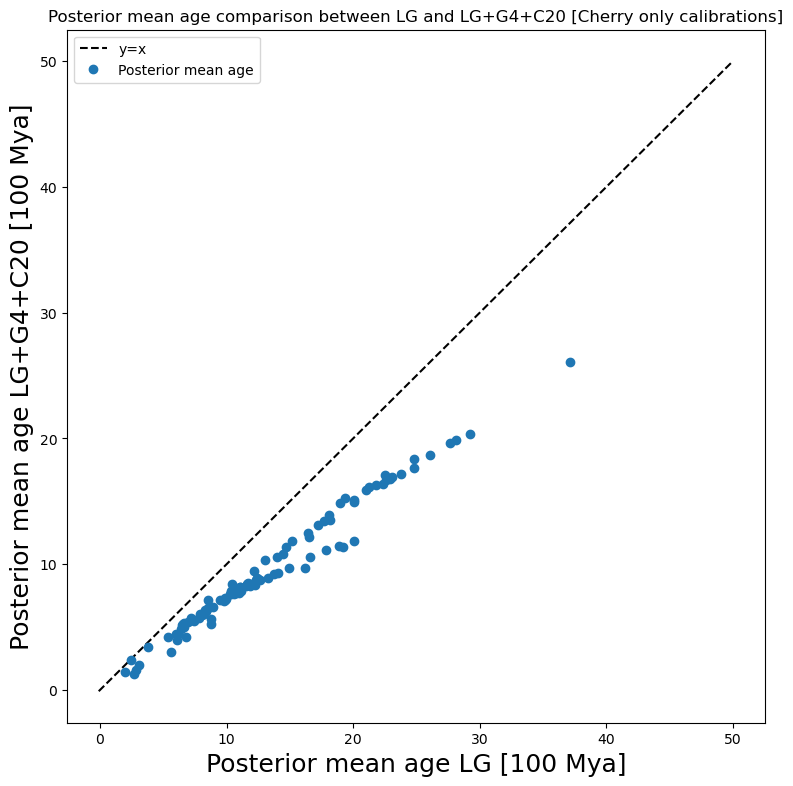

In [25]:
# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(9 ,9))
ax.plot([-0.1,50], 
        [-0.1, 50], 
        'k--', label='y=x')
ax.plot(posterior_mean_baseml, posterior_mean_iqtree, 'o', label='Posterior mean age')
 
# Labels and title
ax.set_xlabel('Posterior mean age LG [100 Mya]', fontsize=18)
ax.set_ylabel('Posterior mean age LG+G4+C20 [100 Mya]', fontsize=18)
ax.set_title('Posterior mean age comparison between LG and LG+G4+C20 [Cherry only calibrations]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./animal_origin_posterior_mean_age_comparison_LG_G4_C20_co_scatter.png')

In [24]:
# fig, ax = plt.subplots(figsize=(9 ,9))
# ax.plot([0.01,0.04], 
#         [0.01, 0.04], 
#         'k--', label='y=x')
# ax.plot(posterior_mean_mu_baseml, posterior_mean_mu_iqtree, 'o', label='Posterior mean rates for partitions')
#  
# # Labels and title
# ax.set_xlabel('Posterior mean rate [LG]', fontsize=18)
# ax.set_ylabel('Posterior mean rate [LG+G4+C20]', fontsize=18)
# ax.set_title('Posterior mean rate comparison between LG and LG+G4 [Cherry only calibration/IQ-TREE]')
# ax.legend()
# 
# # point_x = posterior_mean_baseml[0]  # Example: first point in the list
# # point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# # ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin__posterior_mean_rate_comparison_LG_G4_C20_all_scatter.png')